# Lesson

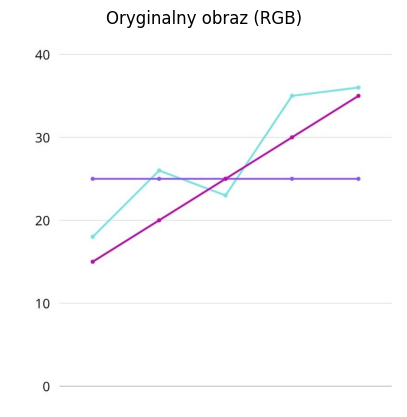

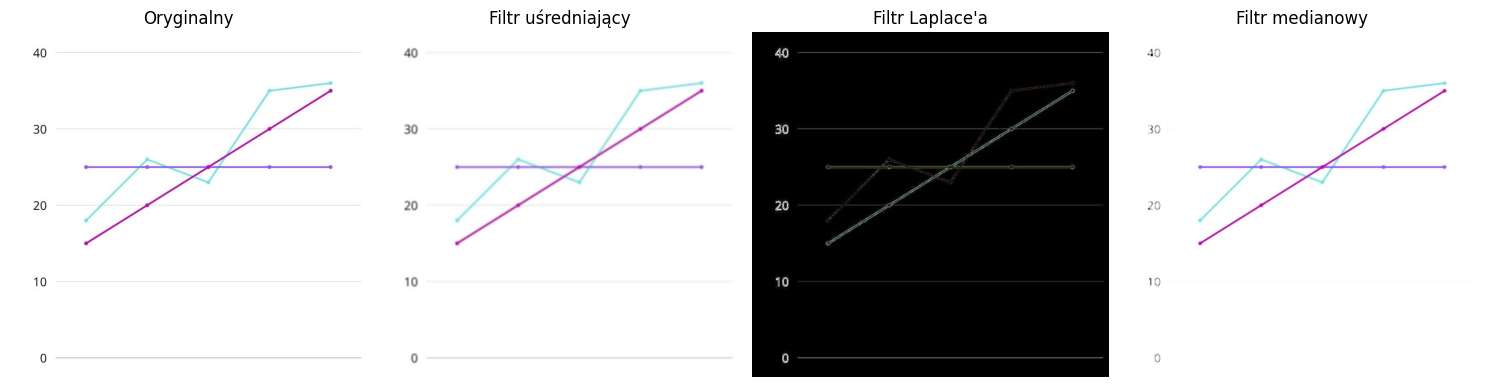

Filtr uśredniający: PSNR=30.83 dB, SSIM=0.9600
Filtr Laplace'a: PSNR=0.11 dB, SSIM=-0.0082
Filtr medianowy: PSNR=31.26 dB, SSIM=0.9649


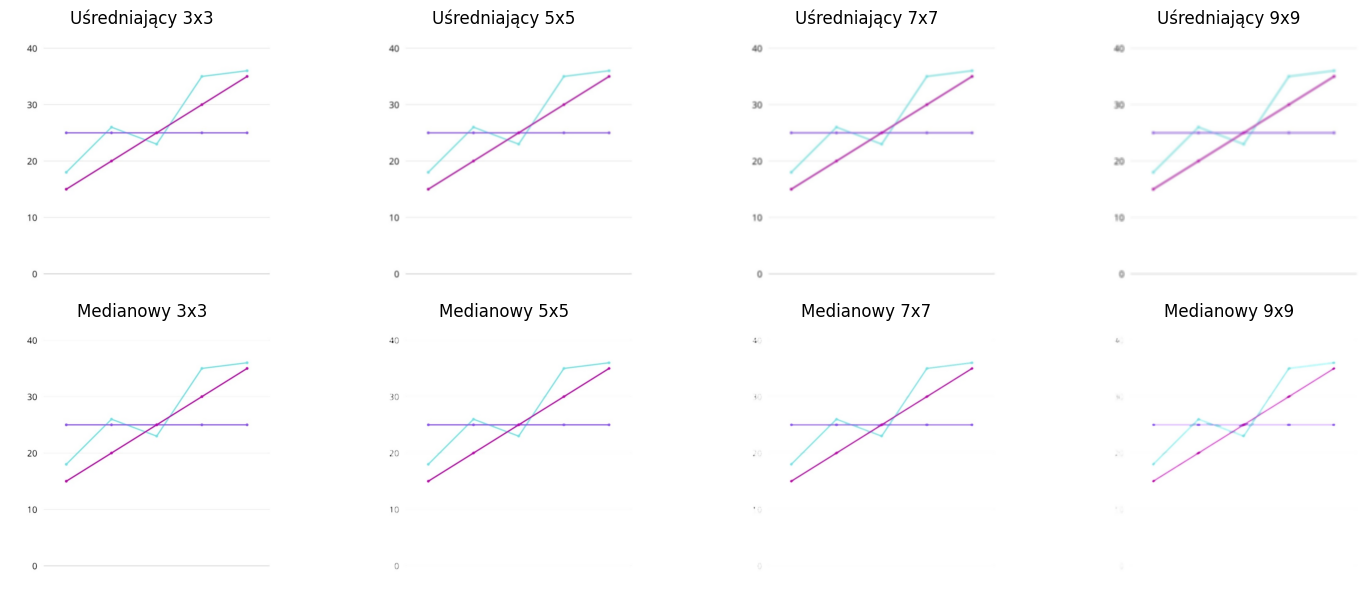

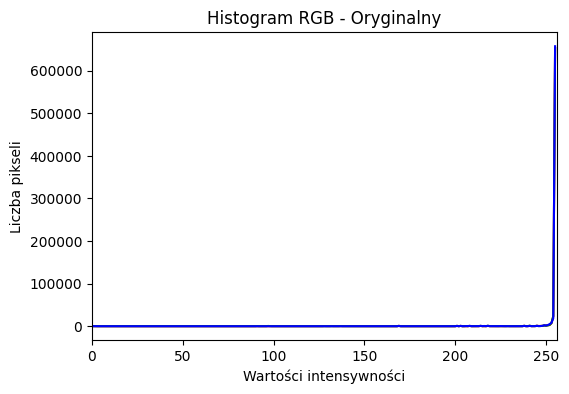

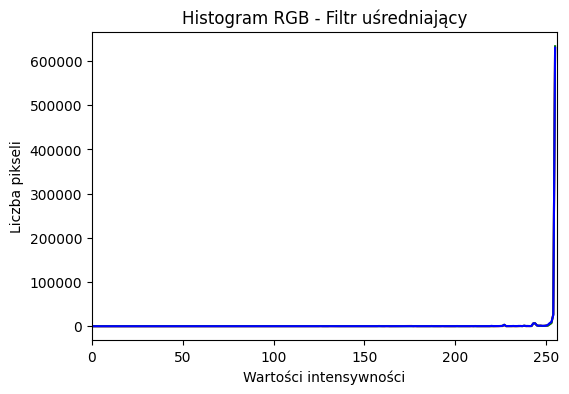

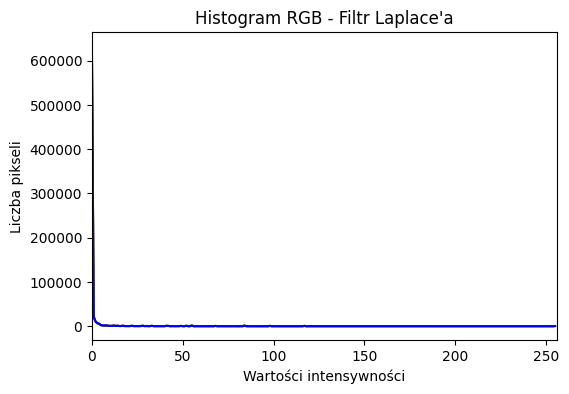

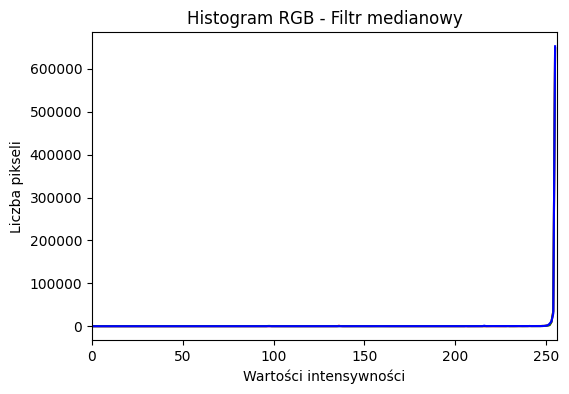

In [1]:
# %%
# Laboratorium 2: Filtracja obrazów RGB
# Temat: Eksperymenty z filtrami przetwarzania obrazów w przestrzeni kolorów

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\1.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\2.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"

# %%
# 1. Wczytanie obrazu w kolorze (BGR -> RGB)
obraz=obraz1
image_bgr = cv2.imread(obraz, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.title("Oryginalny obraz (RGB)")
plt.axis("off")
plt.show()

# %%
# 2. Implementacja filtrów

# Filtr dolnoprzepustowy - uśredniający
#(3x3) maska
avg_kernel_size = 5
filtered_avg = cv2.blur(image, (avg_kernel_size, avg_kernel_size))

# Filtr górnoprzepustowy - Laplace'a
filtered_laplace = cv2.Laplacian(image, cv2.CV_64F)
filtered_laplace = cv2.convertScaleAbs(filtered_laplace)

# Filtr medianowy
median_kernel_size = 5
filtered_median = cv2.medianBlur(image, median_kernel_size)

# %%
# 3. Wizualizacja wyników
fig, axes = plt.subplots(1, 4, figsize=(15,5))

axes[0].imshow(image)
axes[0].set_title("Oryginalny")
axes[0].axis("off")

axes[1].imshow(filtered_avg)
axes[1].set_title("Filtr uśredniający")
axes[1].axis("off")

axes[2].imshow(filtered_laplace)
axes[2].set_title("Filtr Laplace'a")
axes[2].axis("off")

axes[3].imshow(filtered_median)
axes[3].set_title("Filtr medianowy")
axes[3].axis("off")

plt.tight_layout()
plt.show()

# %%
# 4. Ocena wpływu filtrów - metryki jakości

def evaluate_filters(original, filtered):
    psnr_val = psnr(original, filtered, data_range=255)
    ssim_val = ssim(original, filtered, channel_axis=2, data_range=255)
    return psnr_val, ssim_val

metrics = {
    "Filtr uśredniający": evaluate_filters(image, filtered_avg),
    "Filtr Laplace'a": evaluate_filters(image, filtered_laplace),
    "Filtr medianowy": evaluate_filters(image, filtered_median),
}

for name, (psnr_val, ssim_val) in metrics.items():
    print(f"{name}: PSNR={psnr_val:.2f} dB, SSIM={ssim_val:.4f}")

# %%
# 5. Eksperymenty z parametrami - różne rozmiary masek
kernel_sizes = [3, 5, 7, 9]

fig, axes = plt.subplots(2, len(kernel_sizes), figsize=(15,6))

for i, k in enumerate(kernel_sizes):
    avg = cv2.blur(image, (k, k))
    med = cv2.medianBlur(image, k)

    axes[0, i].imshow(avg)
    axes[0, i].set_title(f"Uśredniający {k}x{k}")
    axes[0, i].axis("off")

    axes[1, i].imshow(med)
    axes[1, i].set_title(f"Medianowy {k}x{k}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# %%
# 6. Histogramy kanałów R, G, B

def plot_rgb_histograms(image, title):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(6,4))
    for i, col in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title(f"Histogram RGB - {title}")
    plt.xlabel("Wartości intensywności")
    plt.ylabel("Liczba pikseli")
    plt.show()

plot_rgb_histograms(image, "Oryginalny")
plot_rgb_histograms(filtered_avg, "Filtr uśredniający")
plot_rgb_histograms(filtered_laplace, "Filtr Laplace'a")
plot_rgb_histograms(filtered_median, "Filtr medianowy")

# from pdf

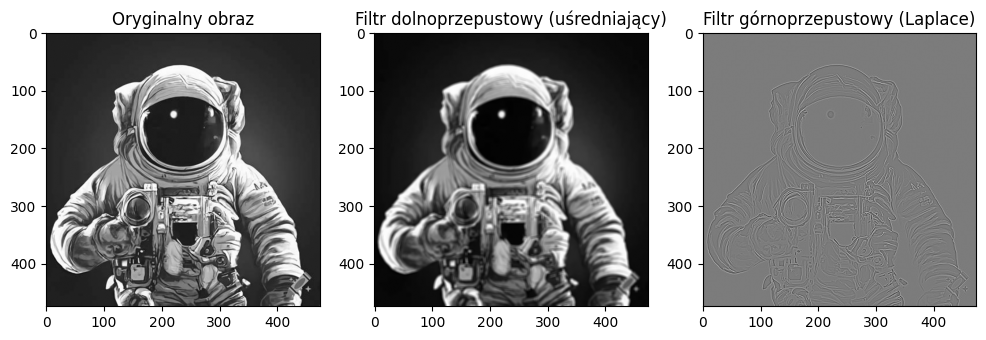

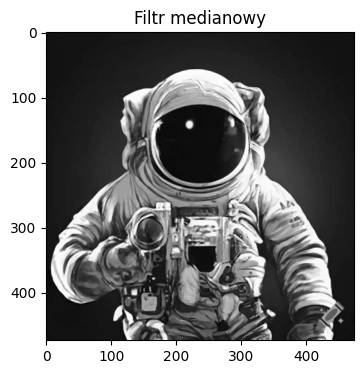

In [13]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Wczytaj obraz 
obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\1.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\2.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"

obraz=obraz4

image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE)  # Wczytaj obraz w odcieniach 
# Filtr dolnoprzepustowy (filtr uśredniający) 
kernel_size = 5  # Rozmiar kernela 
filtered_image_avg = cv2.blur(image, (kernel_size, kernel_size)) 
# Filtr górnoprzepustowy (filtr Laplace'a) 
filtered_image_laplace = cv2.Laplacian(image, cv2.CV_64F) 
# Filtr medianowy 
kernel_size_median = 3  # Rozmiar kernela 
filtered_image_median = cv2.medianBlur(image, kernel_size_median) 
# Wyświetl obrazy 
plt.figure(figsize=(12, 4)) 
plt.subplot(131) 
plt.imshow(image, cmap='gray') 
plt.title('Oryginalny obraz') 
plt.subplot(132) 
plt.imshow(filtered_image_avg, cmap='gray') 


plt.title('Filtr dolnoprzepustowy (uśredniający)') 
plt.subplot(133) 
plt.imshow(filtered_image_laplace, cmap='gray') 
plt.title('Filtr górnoprzepustowy (Laplace)') 
plt.figure(figsize=(6, 4)) 
plt.imshow(filtered_image_median, cmap='gray') 
plt.title('Filtr medianowy') 
plt.show() 

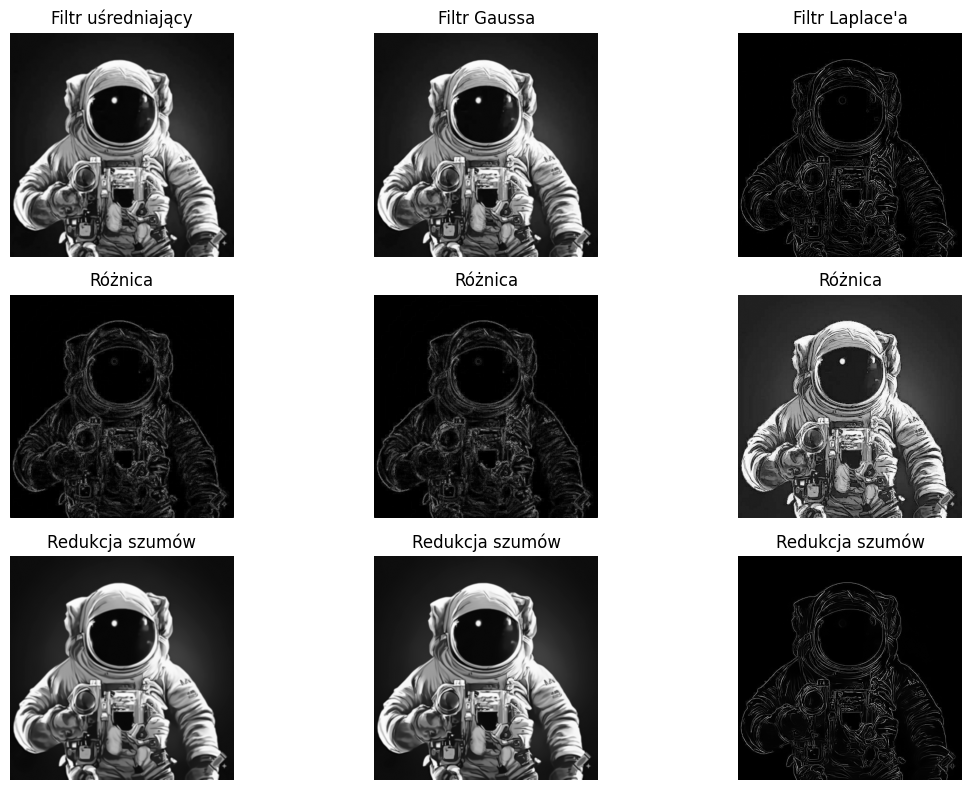

In [14]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Wczytaj obraz do analizy 

image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE)  # Wczytaj obraz w odcieniach 
# Tworzenie list filtrów do porównania 
filters = [ 
    {'name': 'Filtr uśredniający', 'kernel': np.ones((3, 3), np.float32)/9}, 
    {'name': 'Filtr Gaussa', 'kernel': np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32)/16}, 
    {'name': 'Filtr Laplace\'a', 'kernel': np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)} 
] 
# Inicjalizacja subplotów 
fig, axes = plt.subplots(3, len(filters), figsize=(12, 8)) 
# Przetwarzanie obrazu dla każdego filtra i ocena wpływu 
for i, filter_data in enumerate(filters): 
    # Zastosowanie filtra 
    filtered_image = cv2.filter2D(image, -1, filter_data['kernel']) 
        # Obliczenie różnicy między oryginalnym obrazem a przefiltrowanym 
    diff = cv2.absdiff(image, filtered_image) 
        # Redukcja szumów 
    noise_reduction = cv2.fastNlMeansDenoising(filtered_image, None, h=10, templateWindowSize=7, 
searchWindowSize=21) 


        # Wyostrzanie krawędzi 
    sharpened_image = cv2.addWeighted(filtered_image, 1.5, image, -0.5, 0) 
        # Wyświetlenie obrazów 
    axes[0, i].imshow(filtered_image, cmap='gray') 
    axes[0, i].set_title(filter_data['name']) 
    axes[1, i].imshow(diff, cmap='gray') 
    axes[1, i].set_title('Różnica') 
    axes[2, i].imshow(noise_reduction, cmap='gray') 
    axes[2, i].set_title('Redukcja szumów') 
    # Ustawienie tytułów 
axes[0, 0].set_ylabel('Filtracja') 
axes[1, 0].set_ylabel('Różnica') 
axes[2, 0].set_ylabel('Redukcja szumów') 
# Ukrycie osi 
for ax in axes.ravel(): 
    ax.axis('off') 
plt.tight_layout() 
plt.show() 

In [15]:
number=4

cv2.imwrite(f'results/filtered_image_avg{number}.jpg', filtered_image_avg)
cv2.imwrite(f'results/filtered_image_laplace{number}.jpg', filtered_image_laplace)
cv2.imwrite(f'results/filtered_image_median{number}.jpg', filtered_image_median)

True

In [18]:
import numpy as np
import cv2

obraz=obraz4
number=1

obraz1=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\1.jpg"
obraz2=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\2.jpg"
obraz3=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\3.jpg"
obraz4=r"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Photos\4.jpg"

filtered1 = fr"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson2\Results\filtered_image_avg{number}.jpg"
filtered2 = fr"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson2\Results\filtered_image_laplace{number}.jpg"
filtered3 = fr"C:\Users\USER098\Documents\GitHub\ImageProcessingLessons\Lesson2\Results\filtered_image_median{number}.jpg"

# Wczytaj obrazy jako tablice numpy (w odcieniach szarości)
original_image = cv2.imread(obraz, cv2.IMREAD_GRAYSCALE).astype(np.float32)
filtered_image1 = cv2.imread(filtered1, cv2.IMREAD_GRAYSCALE).astype(np.float32)
filtered_image2 = cv2.imread(filtered2, cv2.IMREAD_GRAYSCALE).astype(np.float32)
filtered_image3 = cv2.imread(filtered3, cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Oblicz różnicę między obrazami (mapa szumu)
noise_map1 = original_image - filtered_image1
noise_map2 = original_image - filtered_image2
noise_map3 = original_image - filtered_image3

# Oblicz moc sygnału i moc szumu
signal_power = np.sum(original_image**2)
noise_power1 = np.sum(noise_map1**2)
noise_power2 = np.sum(noise_map2**2)
noise_power3 = np.sum(noise_map3**2)

# Oblicz SNR
snr1 = 10 * np.log10(signal_power / noise_power1)
snr2 = 10 * np.log10(signal_power / noise_power2)
snr3 = 10 * np.log10(signal_power / noise_power3)

print(f"SNR (avg): {snr1:.2f} dB")
print(f"SNR (laplace): {snr2:.2f} dB")
print(f"SNR (median): {snr3:.2f} dB")


ValueError: operands could not be broadcast together with shapes (474,474) (832,860) 

In [ ]:
import cv2 
import numpy as np 

# Wczytaj obraz oryginalny i obraz przefiltrowany 
original_image = cv2.imread('obraz.jpg', cv2.IMREAD_GRAYSCALE) 
filtered_image = cv2.imread('obraz_przefiltrowany.jpg', cv2.IMREAD_GRAYSCALE) 
# Oblicz różnicę między obrazami 
difference_image = cv2.absdiff(original_image, filtered_image)  

# Wybierz region zainteresowania (ROI) zawierający krawędzie 
# Możesz dostosować obszar, aby zawierał krawędzie, które chcesz ocenić 
roi = difference_image[100:300, 100:300] 

# Wylicz średnią różnicę intensywności pikseli w ROI 
average_difference = np.mean(roi) 

# Wydrukuj średnią różnicę, im wyższa, tym wyraźniejsze krawędzie 
print(f"Średnia różnica: {average_difference}")  

# Alternatywnie, możesz obliczyć gradient obrazu przy użyciu operatora Sobela 
sobel_original = cv2.Sobel(original_image, cv2.CV_64F, 1, 1, ksize=5) 
sobel_filtered = cv2.Sobel(filtered_image, cv2.CV_64F, 1, 1, ksize=5) 

# Oblicz różnicę między gradientami 
sobel_difference = cv2.absdiff(sobel_original, sobel_filtered) 

# Oblicz średnią różnicę w obrazie gradientowym 
average_sobel_difference = np.mean(sobel_difference)  

print(f"Średnia różnica w obrazie gradientowym: {average_sobel_difference}") 